# Microsoft Professional Program for Data Science 
# Final Exam

## Goal of this project:

The goal of this project is to analyze the rate spread of mortgage applications according to the given dataset, which is adapted from the Federal Financial Institutions Examination Council's (FFIEC).

## Data preparation

This Jupyter notebook shall give first insights into the data, clean it and prepare it for further processing.

It exports the cleaned and label enhanced data into temp/train_cleaned.xlsx

In [1]:
# Import standard library set and shared definitions of file names and paths
%run -i MPPSharedDefines.py
%matplotlib inline

## Load the training data and merge it with the label data

In [2]:
training_data_pd = pd.read_csv(DATA_PATH+TRAIN_DATA_FN)
training_labels_pd = pd.read_csv(DATA_PATH+TRAIN_LABELS_FN)
test_values_pd = pd.read_csv(DATA_PATH+TEST_VALUES_FN)
print("Missing MSA values {}".format(training_data_pd.loc[training_data_pd['msa_md']==0].shape[0]))
print("Missing state code values {}".format( training_data_pd.loc[training_data_pd['state_code']==-1].shape[0]))
print("Missing county code values {}".format(training_data_pd.loc[training_data_pd['county_code']==0].shape[0]))

training_data_pd = pd.merge(training_data_pd, training_labels_pd, on='row_id', how='left')

Missing MSA values 82
Missing state code values 1338
Missing county code values 689


In [3]:
training_data_pd.count()

row_id                            200000
loan_type                         200000
property_type                     200000
loan_purpose                      200000
occupancy                         200000
loan_amount                       200000
preapproval                       200000
msa_md                            200000
state_code                        200000
county_code                       200000
applicant_ethnicity               200000
applicant_race                    200000
applicant_sex                     200000
applicant_income                  189292
population                        198005
minority_population_pct           198005
ffiecmedian_family_income         198015
tract_to_msa_md_income_pct        197977
number_of_owner-occupied_units    197988
number_of_1_to_4_family_units     197984
lender                            200000
co_applicant                      200000
rate_spread                       200000
dtype: int64

In [4]:
training_data_pd.head(5)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,rate_spread
0,0,2,1,1,1,139.0,1,261,14,246,2,5,1,77.0,5949.0,11.642,63192.0,100.000,1556.0,1993.0,2094,True,1.0
1,1,2,2,1,1,160.0,3,349,48,311,1,5,1,42.0,2667.0,37.141,63693.0,75.729,875.0,1163.0,4194,False,2.0
2,2,1,2,1,1,168.0,3,385,30,256,3,2,1,34.0,6393.0,79.635,42883.0,76.948,636.0,1611.0,1119,False,3.0
3,3,1,2,1,1,57.0,3,117,30,46,1,6,1,37.0,7175.0,72.843,63806.0,78.836,1587.0,2172.0,1119,False,6.0
4,4,2,1,2,1,25.0,3,95,41,192,2,5,2,46.0,5041.0,23.188,70908.0,59.579,756.0,1992.0,1593,False,4.0


## Investigating the training data

### Loan information

* msa_md - Number, Metropolitan Statistical Area/Metropolitan Division, -1 = unknown
* state_code - Number, U.S. state, -1 = unknown
* county_code - Number, County, -1 = unknown
* loan_amount = The amount of money request in dollars
* loan_type - defines whether the loan granted/applied/purchased was conventional, government-guaranteed, or government-insured
    * 1 -- Conventional (any loan other than FHA, VA, FSA, or RHS loans)
    * 2 -- FHA-insured (Federal Housing Administration)
    * 3 -- VA-guaranteed (Veterans Administration)
    * 4 -- FSA/RHS (Farm Service Agency or Rural Housing Service)
* property_type - Defines for which amount of families the house was intended
    * 1 -- One to four-family (other than manufactured housing)
    * 2 -- Manufactured housing
    * 3 -- Multifamily
* loan_purpose - Defines for which goal the loan was requested
    * 1 -- Home purchase
    * 2 -- Home improvement
    * 3 -- Refinancing
* occupancy - Defines if the loan is intended for the owner's dwelling or otherwise
    * 1 -- Owner-occupied as a principal dwelling
    * 2 -- Not owner-occupied
    * 3 -- Not applicable
* preapproval - Indicate whether the application or loan involved a request for a pre-approval    
    * 1 -- Owner-occupied as a principal dwelling
    * 2 -- Not owner-occupied
    * 3 -- Not applicable
* lender - The lender of the loan

### Applicant information

* applicant_income - The applicant's income in thousands of dollars
* applicant_ethnicity - Defines the applicant's ethnicity
    * 1 -- Hispanic or Latino
    * 2 -- Not Hispanic or Latino
    * 3 -- Information not provided by applicant in mail, Internet, or telephone pplication
    * 4 -- Not applicable
    * 5 -- No co-applicant
* applicant_race - The applicant's ethnicity
    * 1 -- American Indian or Alaska Native
    * 2 -- Asian
    * 3 -- Black or African American
    * 4 -- Native Hawaiian or Other Pacific Islander
    * 5 -- White
    * 6 -- Information not provided by applicant in mail, Internet, or telephone application
    * 7 -- Not applicable
    * 8 -- No co-applicant
* applicant_sex - The applicant's sex
    * 1 -- Male
    * 2 -- Female
    * 3 -- Information not provided by applicant in mail, Internet, or telephone application
    * 4 or 5 -- Not applicable
* co_applicant - Defines if there is a co-applicant (like the applicant's spouse)

### Census information (about the neighbourhood)

* population - Total population in tract
* minority_population_pct - Percentage of minority population to total population for tract
* ffiecmedian_family_income - FFIEC Median family income in dollars for the MSA/MD in which the tract is located (adjusted annually by FFIEC)
* tract_to_msa_md_income_pct - % of tract median family income compared to MSA/MD median family income
* number_of_owner-occupied_units - Number of dwellings, including individual condominiums, that are lived in by the owner
* number_of_1_to_4_family_units - Dwellings that are built to house fewer than 5 families


In [5]:
training_data_pd.head(5)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,rate_spread
0,0,2,1,1,1,139.0,1,261,14,246,2,5,1,77.0,5949.0,11.642,63192.0,100.000,1556.0,1993.0,2094,True,1.0
1,1,2,2,1,1,160.0,3,349,48,311,1,5,1,42.0,2667.0,37.141,63693.0,75.729,875.0,1163.0,4194,False,2.0
2,2,1,2,1,1,168.0,3,385,30,256,3,2,1,34.0,6393.0,79.635,42883.0,76.948,636.0,1611.0,1119,False,3.0
3,3,1,2,1,1,57.0,3,117,30,46,1,6,1,37.0,7175.0,72.843,63806.0,78.836,1587.0,2172.0,1119,False,6.0
4,4,2,1,2,1,25.0,3,95,41,192,2,5,2,46.0,5041.0,23.188,70908.0,59.579,756.0,1992.0,1593,False,4.0


In [6]:
training_data_pd.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,rate_spread
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,189292.000000,198005.000000,198005.000000,198015.000000,197977.000000,197988.000000,197984.000000,200000.000000,200000.000000
mean,99999.500000,1.570935,1.154880,1.482605,1.061385,142.574940,2.702950,226.974970,28.202045,166.335230,1.915310,4.762685,1.417540,73.617902,5391.099099,34.238640,64595.355801,89.283022,1402.872401,1927.336618,2001.311505,1.979110
std,57735.171256,0.559410,0.365066,0.822156,0.246043,142.559487,0.545658,106.655259,15.593383,92.852518,0.513273,0.887328,0.577133,105.696934,2669.028807,27.930882,12724.514485,15.059223,706.880410,886.576586,1271.134197,1.656809
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,7.000000,0.326000,17860.000000,6.193000,3.000000,6.000000,0.000000,1.000000
25%,49999.750000,1.000000,1.000000,1.000000,1.000000,67.000000,2.000000,154.000000,14.000000,83.000000,2.000000,5.000000,1.000000,39.000000,3717.000000,10.928000,56654.000000,81.648000,932.000000,1344.000000,963.000000,1.000000
50%,99999.500000,2.000000,1.000000,1.000000,1.000000,116.000000,3.000000,261.000000,30.000000,181.000000,2.000000,5.000000,1.000000,56.000000,4959.000000,25.996000,63485.000000,98.959000,1304.000000,1799.000000,1834.000000,1.000000
75%,149999.250000,2.000000,1.000000,2.000000,1.000000,179.000000,3.000000,318.000000,41.000000,249.000000,2.000000,5.000000,2.000000,83.000000,6470.000000,52.000000,71238.000000,100.000000,1742.000000,2353.000000,3180.000000,2.000000
max,199999.000000,4.000000,3.000000,3.000000,3.000000,11104.000000,3.000000,408.000000,52.000000,316.000000,4.000000,7.000000,4.000000,10042.000000,34126.000000,100.000000,125095.000000,100.000000,8747.000000,13615.000000,4283.000000,99.000000


## Investigating the target labels

* row_id - The row identifier, must match the source row id
* rate_spread - The difference between a typical mortage and the mortage defined for this applicant

In [7]:
training_labels_pd.head(10)

,row_id,rate_spread
0,0,1.0
1,1,2.0
2,2,3.0
3,3,6.0
4,4,4.0
5,5,1.0
6,6,1.0
7,7,1.0
8,8,2.0
9,9,8.0


In [8]:
training_labels_pd.describe()

,row_id,rate_spread
count,200000.000000,200000.000000
mean,99999.500000,1.979110
std,57735.171256,1.656809
min,0.000000,1.000000
25%,49999.750000,1.000000
50%,99999.500000,1.000000
75%,149999.250000,2.000000
max,199999.000000,99.000000


In [9]:
spread_col = training_labels_pd['rate_spread']
print("Spread rate: Min {}, Max {}, Mean {}, Median {} Stddev {}".format(spread_col.min(), spread_col.max(), round(spread_col.mean(), 1), spread_col.median(), round(spread_col.std(),1)))

Spread rate: Min 1.0, Max 99.0, Mean 2.0, Median 1.0 Stddev 1.7


In [10]:
test_values_pd.head(10)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,1,2,1,1,46.0,3,262,37,83,1,5,2,50.0,10761.0,43.415,61732.0,100.000,2900.0,3603.0,1119,False
1,1,1,1,3,1,170.0,3,282,11,267,2,5,1,155.0,2285.0,20.115,50373.0,100.000,539.0,873.0,4216,False
2,2,1,1,1,1,174.0,3,274,12,162,1,5,1,102.0,7765.0,78.621,75175.0,54.165,1559.0,1712.0,2467,False
3,3,1,1,1,2,116.0,2,254,37,282,2,5,1,51.0,3387.0,96.208,48677.0,74.476,938.0,784.0,2773,True
4,4,1,1,3,1,108.0,3,194,41,17,2,5,1,88.0,3106.0,6.370,68070.0,100.000,1119.0,1301.0,3110,False
5,5,1,1,1,1,53.0,3,215,11,39,2,3,1,26.0,6338.0,89.621,68957.0,88.605,1303.0,1837.0,356,False
6,6,1,1,3,1,175.0,3,294,31,101,2,5,1,55.0,4488.0,4.468,84698.0,100.000,1290.0,1444.0,1657,False
7,7,2,1,1,1,135.0,2,339,14,230,1,5,1,40.0,6896.0,22.123,65203.0,81.272,1933.0,2772.0,809,False
8,8,2,1,1,1,290.0,3,29,30,174,1,5,1,72.0,4587.0,90.579,59894.0,100.000,884.0,1173.0,4243,False
9,9,1,1,1,1,4.0,3,154,33,232,2,5,1,57.0,7436.0,52.746,65855.0,88.008,1892.0,3039.0,3038,False


In [11]:
test_values_pd.count()

row_id                            200000
loan_type                         200000
property_type                     200000
loan_purpose                      200000
occupancy                         200000
loan_amount                       200000
preapproval                       200000
msa_md                            200000
state_code                        200000
county_code                       200000
applicant_ethnicity               200000
applicant_race                    200000
applicant_sex                     200000
applicant_income                  189629
population                        198082
minority_population_pct           198080
ffiecmedian_family_income         198095
tract_to_msa_md_income_pct        198054
number_of_owner-occupied_units    198067
number_of_1_to_4_family_units     198067
lender                            200000
co_applicant                      200000
dtype: int64

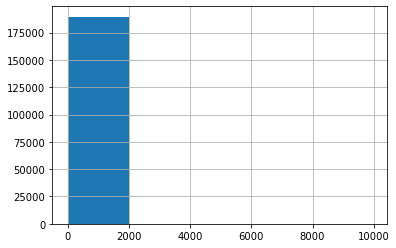

In [12]:
test_values_pd['applicant_income'].hist(bins=5)

In [13]:
income_outliers = test_values_pd.loc[test_values_pd['applicant_income']>2000]
income_outliers.head(10)
# income_outliers = test_values_pd.loc[test_values_pd['loan_amount']<2]
# print(income_outliers.count())

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
47,47,1,1,3,2,356.0,3,352,48,20,2,5,1,2054.0,3350.0,20.422,70908.0,100.000,968.0,1152.0,2008,False
212,212,1,1,3,1,2861.0,3,261,25,76,2,5,1,2114.0,2869.0,2.747,56113.0,100.000,958.0,1197.0,3565,True
282,282,1,1,1,2,1000.0,2,348,7,240,3,6,1,2938.0,3851.0,14.989,71489.0,80.946,391.0,809.0,4237,False
2252,2252,1,1,1,2,94.0,3,136,14,273,2,5,1,2077.0,8112.0,6.502,76456.0,100.000,2418.0,2719.0,841,True
2925,2925,1,1,3,1,1187.0,3,215,11,204,2,3,1,2046.0,7063.0,26.546,68667.0,100.000,1910.0,1891.0,4237,False
3423,3423,1,1,3,1,1498.0,3,332,24,101,2,5,1,2355.0,1780.0,21.725,59050.0,100.000,562.0,753.0,1645,True
5120,5120,1,1,1,2,2847.0,2,199,46,13,2,2,2,3076.0,4571.0,23.171,89158.0,100.000,1576.0,1792.0,4237,False
12777,12777,1,1,3,2,5062.0,3,348,7,240,2,5,1,2976.0,3645.0,88.987,69402.0,78.983,269.0,775.0,3743,True
14660,14660,1,1,1,2,243.0,3,352,48,264,1,5,1,2957.0,33393.0,41.990,68058.0,100.000,6762.0,7474.0,2788,False
14900,14900,1,1,1,1,762.0,3,352,48,20,2,5,1,3192.0,6053.0,26.216,70390.0,100.000,2093.0,2417.0,4038,True


### Initial discovery goals:

* Minimum loan rate spread
* Maximum loan rate spread
* Mean loan rate spread
* Median loan rate spread
* Standard deviation of loan rate spread
* Visualize the loan rate spread as histogram
* Which two of the following statements are true?
    * Applicants where applicant_ethnicity=3 have a higher rate spread on average than where applicant_ethnicity=1.
    * Applicants where applicant_ethnicity=3 have a lower rate spread on average than where applicant_ethnicity=1.
    * Applicants where applicant_sex=1 have a lower rate spread on average than where applicant_sex=2.
    * Applicants where applicant_sex=1 have a higher rate spread on average than where applicant_sex=2.
* For applicants in state 43, which of the following best describes the relationship between applicant income and loan amount?
    * A — A higher applicant income is associated with a higher loan amount, on average.
    * B — A higher applicant income is associated with a lower loan amount, on average.
    * C — There is not a strong and obvious correlation between applicant income and loan amount, on average.
* Limiting just to state 48 and ignoring where county is missing (missing value being -1), which of the following statements is true?
    * A — In state 48, the average rate spread across counties varies substantially, ranging from 0% to 10%.
    * B — In state 48, the average rate spread across counties varies substantially, ranging from around 1% to around 7%.
    * C — Counties within state 48 all have similar levels of loan rates.    
* Loan types across states -Looking just at states 2 and 3 and just loan types 1, 2, and 3 which of the following statements is true?
    * A — For loan types  1 ,  2 , and  3 , the average rate spread in state  2  is higher than the overall rate among states  2  and  3 .
    * B — For loan types  1 ,  2 , and  3 , the average rate spread in state  3  is lower than the overall rate among states  2  and  3 
    * C — For loan types  1 ,  2 , and  3 , the average rate spread in state  2  is higher than for the corresponding loan type in state  3 .
    * D — For loan types  1 ,  2 , and  3 , the average rate spread in state  2  is lower than for the corresponding loan type in state  3 .
* Data ethics: With great power comes great responsibility. Part of the responsibilities of a data scientist includes thinking about the ethical implications of your work, such as was discussed during the MPP course. It is therefore important to be able to spot when different ethical issues may arise.

    For the following scenario, familiarize yourself with, then use this Data Science Ethics Checklist, (part of the open source deon command line tool) to find the most relevant ethical concerns.
A bank wants to improve its creditworthiness assessment and decides to hire a team of data scientists to build an algorithm to predict the likelihood that an applicant will default on their loan. The data science team finds that whether or not a loan applicant graduated from a highly selective college is a good predictor of loan default. If this feature is used in the bank's algorithm, which ethical concern is most salient? https://github.com/drivendataorg/deon/blob/master/examples/ethics.md

    * D1: Proxy discrimination
    * C3: Honest representation
    * E4: Unintended use
    * B1: Data security

* For the following scenario, familiarize yourself with, then use this Data Science Ethics Checklist, (part of the open source deon command line tool) to choose the best answer.

    The data science team decides to bring in social media data as they have found that the creditworthiness of an applicant's friends is a good indicator of the applicant's own creditworthiness. Which set of ethical concerns is most relevant here?
    
    * C5: Auditability, E3: Concept drift
    * E4: Unintended use, D3: Metric selection
    * C2: Dataset bias, D2: Fairness across groups    

## Outlier removal

There are some very obvious outliers which we will remove at this point so they won't negatively influence the further processing.. It are just a dozen values (within the dataset of 20,000) values whose values are extremely off at mortage rates near 100.

In [14]:
# training_data_pd_org = training_data_pd.copy()

In [15]:
from scipy import stats
# training_data_pd = training_data_pd_org[(np.abs(stats.zscore(training_data_pd_org[['rate_spread']])) < 4).all(axis=1)].copy()
training_data_pd.loc[training_data_pd['rate_spread']>8.0, 'rate_spread'] = 8.0
print(training_data_pd.count())

row_id                            200000
loan_type                         200000
property_type                     200000
loan_purpose                      200000
occupancy                         200000
loan_amount                       200000
preapproval                       200000
msa_md                            200000
state_code                        200000
county_code                       200000
applicant_ethnicity               200000
applicant_race                    200000
applicant_sex                     200000
applicant_income                  189292
population                        198005
minority_population_pct           198005
ffiecmedian_family_income         198015
tract_to_msa_md_income_pct        197977
number_of_owner-occupied_units    197988
number_of_1_to_4_family_units     197984
lender                            200000
co_applicant                      200000
rate_spread                       200000
dtype: int64


## Rate spread distribution

In the chart below you can see the distribution of the rate spread. It his heavily right skewed. The huge majority of the applicatants seems to be located within the 1 to 3% region. Above this region the minority of the applicant's is located which a though still not insignifant amount.

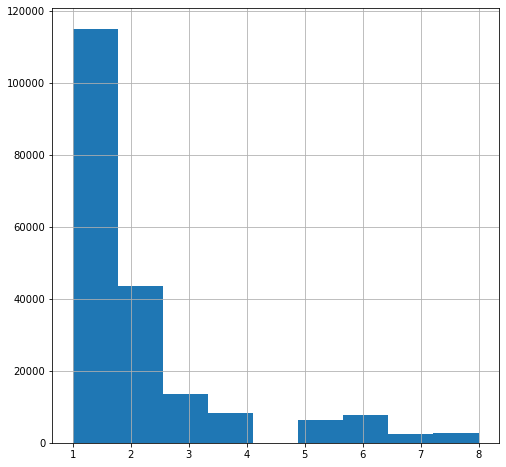

In [16]:
f = plt.figure(figsize=(8, 8))
training_data_pd['rate_spread'].hist(bins=9)

In [17]:
bequal_1 = training_data_pd[training_data_pd['rate_spread']<=1].shape[0]/training_data_pd.shape[0]
print("{:.2f}% of credits below or equal to a spread of 1%".format(bequal_1*100))
bequal_2 = training_data_pd[training_data_pd['rate_spread']<=2].shape[0]/training_data_pd.shape[0]
print("{:.2f}% of credits below or equal to a spread of 2%".format(bequal_2*100))
bequal_3 = training_data_pd[training_data_pd['rate_spread']<=3].shape[0]/training_data_pd.shape[0]
print("{:.2f}% of credits below or equal to a spread of 3%".format(bequal_3*100))
bequal_4 = training_data_pd[training_data_pd['rate_spread']<=4].shape[0]/training_data_pd.shape[0]
print("{:.2f}% of credits below or equal to a spread of 4%".format(bequal_4*100))
bequal_5 = training_data_pd[training_data_pd['rate_spread']<=5].shape[0]/training_data_pd.shape[0]
print("{:.2f}% of credits below or equal to a spread of 5%".format(bequal_5*100))
bequal_10 = training_data_pd[training_data_pd['rate_spread']<=8].shape[0]/training_data_pd.shape[0]
print("{:.2f}% of credits below or equal to a spread of 10%".format(bequal_10*100))

dist_df = pd.DataFrame()
dist_df['<= 1%'] = [bequal_1*100]
dist_df['<= 2%'] = [bequal_2*100]
dist_df['<= 3%'] = [bequal_3*100]
dist_df['<= 4%'] = [bequal_4*100]
dist_df['<= 5%'] = [bequal_5*100]
dist_df['<= 10%'] = [bequal_10*100]

57.55% of credits below or equal to a spread of 1%
79.28% of credits below or equal to a spread of 2%
86.11% of credits below or equal to a spread of 3%
90.25% of credits below or equal to a spread of 4%
93.43% of credits below or equal to a spread of 5%
100.00% of credits below or equal to a spread of 10%


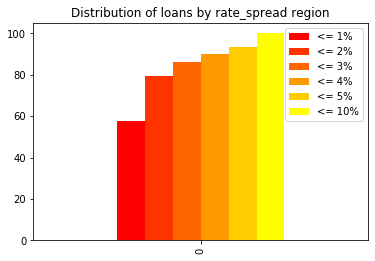

In [18]:
dist_df.plot(kind='bar', colormap="autumn")
plt.title("Distribution of loans by rate_spread region")
plt.show()

## Search for invalid values

In [19]:
nan_df = training_data_pd[training_data_pd.isna().any(axis=1)]
nan_df.head(5)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,rate_spread
16,16,2,1,3,1,105.0,3,404,18,55,2,5,2,NaN,7201.0,12.224,70991.0,86.992,1815.0,2421.0,2130,False,1.0
20,20,2,1,3,1,24.0,3,110,48,254,1,5,1,NaN,6356.0,97.719,42203.0,100.000,927.0,1119.0,659,False,2.0
47,47,2,1,3,1,130.0,3,95,41,41,2,5,2,NaN,9262.0,13.605,69199.0,87.904,1684.0,2327.0,3864,True,1.0
53,53,1,1,3,1,241.0,3,261,-1,316,2,5,2,139.0,NaN,NaN,NaN,NaN,NaN,NaN,4162,True,3.0
55,55,2,1,3,1,368.0,3,348,19,101,2,6,1,NaN,7632.0,18.956,71893.0,100.000,2105.0,2419.0,1457,True,1.0


In [20]:
training_data_pd.count()

row_id                            200000
loan_type                         200000
property_type                     200000
loan_purpose                      200000
occupancy                         200000
loan_amount                       200000
preapproval                       200000
msa_md                            200000
state_code                        200000
county_code                       200000
applicant_ethnicity               200000
applicant_race                    200000
applicant_sex                     200000
applicant_income                  189292
population                        198005
minority_population_pct           198005
ffiecmedian_family_income         198015
tract_to_msa_md_income_pct        197977
number_of_owner-occupied_units    197988
number_of_1_to_4_family_units     197984
lender                            200000
co_applicant                      200000
rate_spread                       200000
dtype: int64

In [21]:
test_values_pd.count()

row_id                            200000
loan_type                         200000
property_type                     200000
loan_purpose                      200000
occupancy                         200000
loan_amount                       200000
preapproval                       200000
msa_md                            200000
state_code                        200000
county_code                       200000
applicant_ethnicity               200000
applicant_race                    200000
applicant_sex                     200000
applicant_income                  189629
population                        198082
minority_population_pct           198080
ffiecmedian_family_income         198095
tract_to_msa_md_income_pct        198054
number_of_owner-occupied_units    198067
number_of_1_to_4_family_units     198067
lender                            200000
co_applicant                      200000
dtype: int64

## Making tables human readable

For better readability we exchange the IDs through human readable labels in new columns.

In [22]:
sex_dict = {1 : 'Male (1)', 2: 'Female (2)', 3: 'Unknown', 4: 'Unknown', 5: 'Unknown'}
race_dict = {1 : 'Native(1)', 2: 'Asian(2)', 3: 'Black/African(3)', 4: 'Hawaiian/Pacific(4)', 5: 'White(5)', 6: 'Unknown', 7: 'Unknown', 8: 'Unknown'}
eth_dict = {1: 'Hispanic/Latino(1)', 2: 'Non-Hispanic(2)', 3: 'Unknown(3)', 4: 'Unknown(4)', 5: 'Unknown(5)'}
loan_type_dict = {1: 'Conventional(1)', 2: 'FHA-insured(2)', 3: 'VA-guaranteed(3)', 4: 'FSA/RHS(4)'}
property_type_dict = {1: '1-4-family-non-mf(1)', 2: 'Manufactured housing(2)', 3: 'Multifamily(3)'}
purpose_dict = {1: 'Home purchase(1)', 2: 'Home improvement(2)', 3: 'Refinancing(3)'}

training_data_pd['sex_name'] = training_data_pd['applicant_sex'].map(sex_dict)
training_data_pd['ethnicity_name'] = training_data_pd['applicant_ethnicity'].map(eth_dict)
training_data_pd['race_name'] = training_data_pd['applicant_race'].map(race_dict)
training_data_pd['loan_type_name'] = training_data_pd['loan_type'].map(loan_type_dict)
training_data_pd['property_type_name'] = training_data_pd['property_type'].map(property_type_dict)
training_data_pd['purpose_name'] = training_data_pd['loan_purpose'].map(purpose_dict)

training_data_pd.head(5)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,rate_spread,sex_name,ethnicity_name,race_name,loan_type_name,property_type_name,purpose_name
0,0,2,1,1,1,139.0,1,261,14,246,2,5,1,77.0,5949.0,11.642,63192.0,100.000,1556.0,1993.0,2094,True,1.0,Male (1),Non-Hispanic(2),White(5),FHA-insured(2),1-4-family-non-mf(1),Home purchase(1)
1,1,2,2,1,1,160.0,3,349,48,311,1,5,1,42.0,2667.0,37.141,63693.0,75.729,875.0,1163.0,4194,False,2.0,Male (1),Hispanic/Latino(1),White(5),FHA-insured(2),Manufactured housing(2),Home purchase(1)
2,2,1,2,1,1,168.0,3,385,30,256,3,2,1,34.0,6393.0,79.635,42883.0,76.948,636.0,1611.0,1119,False,3.0,Male (1),Unknown(3),Asian(2),Conventional(1),Manufactured housing(2),Home purchase(1)
3,3,1,2,1,1,57.0,3,117,30,46,1,6,1,37.0,7175.0,72.843,63806.0,78.836,1587.0,2172.0,1119,False,6.0,Male (1),Hispanic/Latino(1),Unknown,Conventional(1),Manufactured housing(2),Home purchase(1)
4,4,2,1,2,1,25.0,3,95,41,192,2,5,2,46.0,5041.0,23.188,70908.0,59.579,756.0,1992.0,1593,False,4.0,Female (2),Non-Hispanic(2),White(5),FHA-insured(2),1-4-family-non-mf(1),Home improvement(2)


sex_name
Male (1)      1.959544
Female (2)    1.972796
Unknown       2.218415
Name: rate_spread, dtype: float64


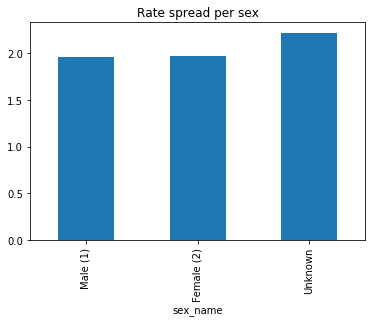

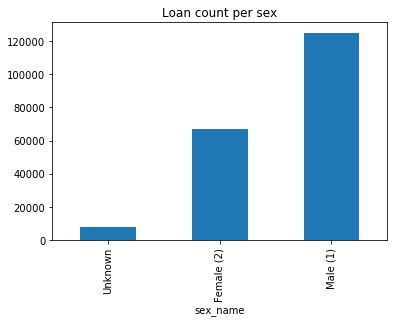

In [23]:
grouped_data = training_data_pd.groupby('sex_name')['rate_spread'].mean().sort_values()
print(grouped_data.head(5))
grouped_data.plot(kind='bar')
plt.title("Rate spread per sex")
plt.show()
grouped_data = training_data_pd.groupby('sex_name')['rate_spread'].count().sort_values()
grouped_data.plot(kind='bar')
plt.title("Loan count per sex")
plt.show()

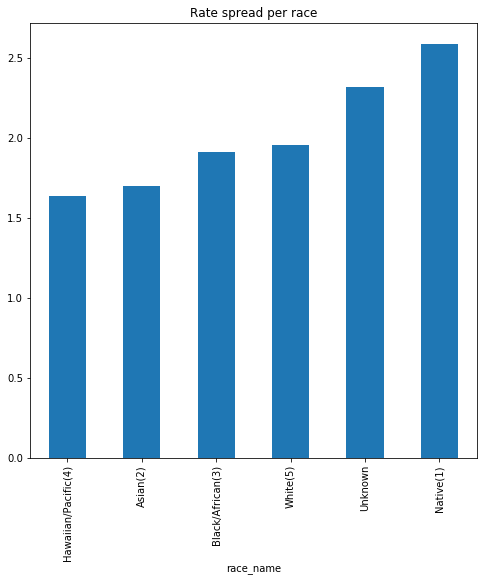

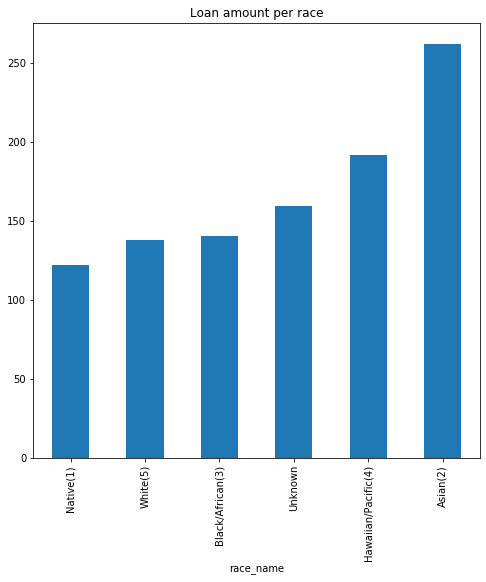

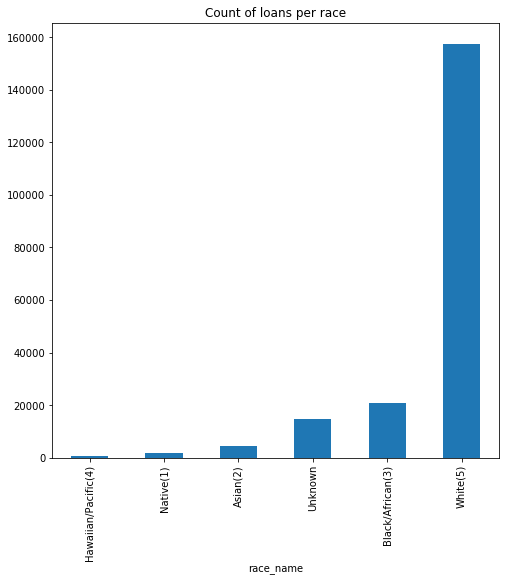

In [24]:
f = plt.figure(figsize=(8, 8))
training_data_pd.groupby('race_name')['rate_spread'].mean().sort_values().plot(kind='bar')
plt.title("Rate spread per race")
plt.show()
f = plt.figure(figsize=(8, 8))
training_data_pd.groupby('race_name')['loan_amount'].mean().sort_values().plot(kind='bar')
plt.title("Loan amount per race")
plt.show()
f = plt.figure(figsize=(8, 8))
training_data_pd.groupby('race_name')['loan_amount'].count().sort_values().plot(kind='bar')
plt.title("Count of loans per race")
plt.show()

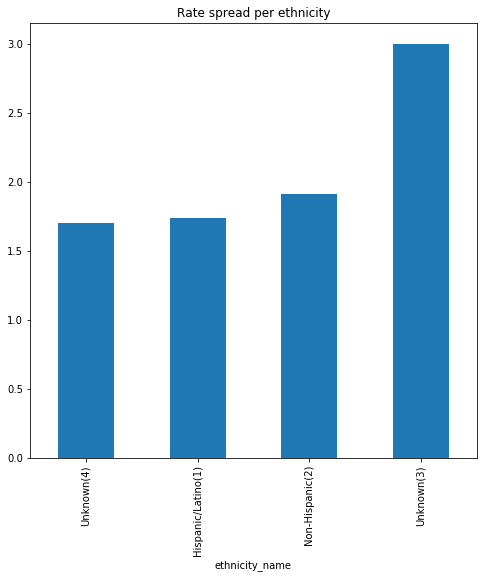

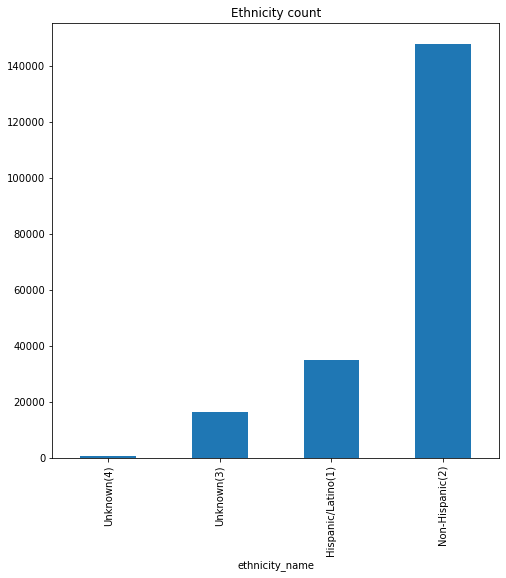

In [25]:
f = plt.figure(figsize=(8, 8))
training_data_pd.groupby('ethnicity_name')['rate_spread'].mean().sort_values().plot(kind='bar')
plt.title("Rate spread per ethnicity")
plt.show()
f = plt.figure(figsize=(8, 8))
training_data_pd.groupby('ethnicity_name')['rate_spread'].count().sort_values().plot(kind='bar')
plt.title("Ethnicity count")
plt.show()

In [26]:
def enhance_data_with_categories(original_data):
    enhanced_data = original_data
    # Downscale FFIEC median income by factor 1000 to match own income
    enhanced_data['ffiecmedian_family_income'] = enhanced_data['ffiecmedian_family_income']/1000.0
    enhanced_data['tract_income'] = enhanced_data['ffiecmedian_family_income'] * enhanced_data['tract_to_msa_md_income_pct'] / 100
    enhanced_data['sex_male'] = enhanced_data['applicant_sex']==1
    enhanced_data['sex_female'] = enhanced_data['applicant_sex']==2
    enhanced_data['sex_other'] = enhanced_data['applicant_sex']>2
    enhanced_data['purp_purchase'] = enhanced_data['loan_purpose']==1
    enhanced_data['purp_improvement'] = enhanced_data['loan_purpose']==2
    enhanced_data['purp_refinancing'] = enhanced_data['loan_purpose']==3
    enhanced_data['type_1_to_4'] = enhanced_data['property_type']==1
    enhanced_data['type_manuf'] = enhanced_data['property_type']==2
    enhanced_data['type_multi_fam'] = enhanced_data['property_type']==3
    enhanced_data['oc_owner_occ'] = enhanced_data['occupancy']==1
    enhanced_data['oc_not_owner_occ'] = enhanced_data['occupancy']==2
    enhanced_data['oc_not_app'] = enhanced_data['occupancy']==3
    enhanced_data['preapp_owner_occ'] = enhanced_data['preapproval']==1
    enhanced_data['preapp_not_oo'] = enhanced_data['preapproval']==2
    enhanced_data['preapp_not_app'] = enhanced_data['preapproval']==3
    enhanced_data['type_convl'] = enhanced_data['loan_type']==1
    enhanced_data['type_fha'] = enhanced_data['loan_type']==2
    enhanced_data['type_va'] = enhanced_data['loan_type']==3
    enhanced_data['type_fsarhs'] = enhanced_data['loan_type']==4
    enhanced_data['race_white'] = enhanced_data['applicant_race']==5
    enhanced_data['race_black'] = enhanced_data['applicant_race']==3
    enhanced_data['race_asian'] = enhanced_data['applicant_race']==2
    enhanced_data['race_hawaiian'] = enhanced_data['applicant_race']==4
    enhanced_data['race_native'] = enhanced_data['applicant_race']==1
    enhanced_data['race_not_prov'] = enhanced_data['applicant_race']==6
    enhanced_data['eth_hispanic'] = enhanced_data['applicant_ethnicity']==1
    enhanced_data['eth_non_his'] = enhanced_data['applicant_ethnicity']==2
    enhanced_data['eth_not_prov'] = enhanced_data['applicant_ethnicity']==3
    enhanced_data['sex_not_prov'] = enhanced_data['applicant_sex']==3
    enhanced_data['income_not_prov'] = 0
    enhanced_data.loc[enhanced_data['applicant_income'].isnull(), 'income_not_prov'] = 1
    
    return enhanced_data

training_data_pd = enhance_data_with_categories(training_data_pd)
test_values_pd = enhance_data_with_categories(test_values_pd)

In [27]:
def enhance_data_with_aggregations(reference_data, original_data):
    enhanced_data = original_data
    global_spread_mean = reference_data['rate_spread'].mean()
    enhanced_data['msa_spread'] = global_spread_mean
    enhanced_data['lender_spread'] = global_spread_mean
    enhanced_data['county_spread'] = global_spread_mean

    # iterate all lenders
    lenders = reference_data['lender'].sort_values().unique()
    for lender_index in lenders:
        lender_spread_mean = reference_data.loc[reference_data['lender']==lender_index]['rate_spread'].mean()
        enhanced_data.loc[enhanced_data['lender']==lender_index,'lender_spread'] = lender_spread_mean

    # iterate all metroplitan regions
    msas = reference_data['msa_md'].sort_values().unique()
    for msa_index in msas:
        msa_spread_mean = reference_data.loc[reference_data['msa_md']==msa_index]['rate_spread'].mean()
        enhanced_data.loc[enhanced_data['msa_md']==msa_index,'msa_spread'] = msa_spread_mean    

    # iterate all states
    states = reference_data['state_code'].sort_values().unique()
    for state_index in states:
        ref_state_indices = reference_data['state_code']==state_index
        ref_state_rows = reference_data.loc[ref_state_indices]
        state_spread_mean = ref_state_rows['rate_spread'].mean()
        
        county_mean_sp_dict = ref_state_rows.groupby(['county_code'])['rate_spread'].mean().to_dict()
        
        tar_state_indices = enhanced_data['state_code']==state_index
        tar_state_rows = enhanced_data.loc[tar_state_indices]
        enhanced_data.loc[tar_state_indices,'state_spread'] = state_spread_mean
        enhanced_data.loc[tar_state_indices,'county_spread'] = tar_state_rows['county_code'].map(
            county_mean_sp_dict, na_action=state_spread_mean)
        enhanced_data.loc[enhanced_data['county_spread'].isnull(),'county_spread'] = state_spread_mean
        
    return enhanced_data
        
training_data_pd = enhance_data_with_aggregations(training_data_pd, training_data_pd)
test_values_pd = enhance_data_with_aggregations(training_data_pd, test_values_pd)

In [28]:
def drop_categorical_values(original_data):
    enhanced_data = original_data[['applicant_income', 'loan_amount']]
    return enhanced_data

pure_training_data = drop_categorical_values(training_data_pd).dropna()
pure_training_data.head(5)

,applicant_income,loan_amount
0,77.0,139.0
1,42.0,160.0
2,34.0,168.0
3,37.0,57.0
4,46.0,25.0


In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

just_income = pure_training_data['applicant_income']
without_income = pure_training_data.drop('applicant_income', axis=1)

just_income.head(5)

0    77.0
1    42.0
2    34.0
3    37.0
4    46.0
Name: applicant_income, dtype: float64

In [30]:
without_income.head(5)

,loan_amount
0,139.0
1,160.0
2,168.0
3,57.0
4,25.0


In [31]:
just_income = np.array(just_income)
without_income = np.array(without_income)

In [32]:
scaler = preprocessing.StandardScaler().fit(without_income)
scaled_features = scaler.transform(without_income)
labels = just_income.reshape(-1, 1)
print(labels.shape)
income_scaler = preprocessing.StandardScaler().fit(labels)
labels = income_scaler.transform(labels)
print(labels.shape)

X_train, X_test, y_train, y_test = ms.train_test_split(scaled_features, labels, test_size=0.33, random_state=42)
print(y_train.shape)
print(y_test.shape)

import scipy.stats as ss

def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

(189292, 1)
(189292, 1)
(126825, 1)
(62467, 1)


Mean Square Error      = 0.9265479656396873
Root Mean Square Error = 0.9625736156989175
Mean Absolute Error    = 0.32219042655538044
Median Absolute Error  = 0.21508146452298374
R^2                    = 0.15784822365180085
Adjusted R^2           = 0.15784822365180085


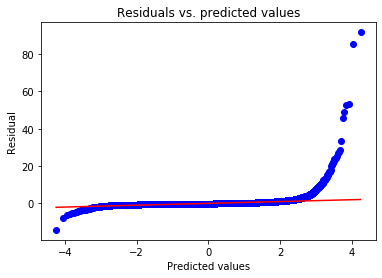

Rescaled:
Mean Square Error      = 10351.19261550409
Root Mean Square Error = 101.7408109634678
Mean Absolute Error    = 34.05445022364213
Median Absolute Error  = 22.733391261602293
R^2                    = 0.15784822365180107
Adjusted R^2           = 0.15784822365180107


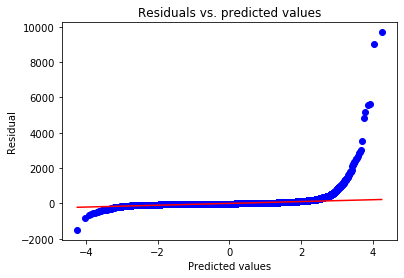

In [33]:
lin_mod = linear_model.LinearRegression()
lin_mod.fit(X_train, y_train)
y_score = lin_mod.predict(X_test) 
print_metrics(y_test, y_score, without_income.shape[1])
resid_qq(y_test, y_score)
plt.show()
rescaled_score = income_scaler.inverse_transform(y_score)
rescaled_test = income_scaler.inverse_transform(y_test)
print("Rescaled:")
print_metrics(rescaled_test, rescaled_score, without_income.shape[1])
resid_qq(rescaled_test, rescaled_score)

In [34]:
training_data_pd.loc[training_data_pd['income_not_prov']==1, 'applicant_income'] = np.NaN
                     
income_missing = training_data_pd.loc[training_data_pd['applicant_income'].isnull()].drop(['applicant_income'], axis=1)
if 'income_loan_rel' in income_missing.columns:
    income_missing = income_missing.drop(['income_loan_rel'], axis=1)

print(income_missing.shape)
income_missing = income_missing.dropna(axis=0)
print(income_missing.shape)

pure_x_values = income_missing
pure_x_values['applicant_income'] = 0
print(pure_x_values.shape)
pure_x_values = drop_categorical_values(pure_x_values)
pure_x_values = pure_x_values.drop('applicant_income', axis=1)
print(pure_x_values.shape)

rescaled_features = scaler.transform(pure_x_values)
print(rescaled_features.shape)
predicted_feature = lin_mod.predict(rescaled_features)
estimated_incomes = income_scaler.inverse_transform(predicted_feature)

print(estimated_incomes.shape)

# income_loan_rel

(10708, 63)
(10661, 63)
(10661, 64)
(10661, 1)
(10661, 1)
(10661, 1)


In [35]:
# training_data_pd.loc[income_missing.index, "applicant_income"] = estimated_incomes
income_missing.head(5)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,rate_spread,sex_name,ethnicity_name,race_name,loan_type_name,property_type_name,purpose_name,tract_income,sex_male,sex_female,sex_other,purp_purchase,purp_improvement,purp_refinancing,type_1_to_4,type_manuf,type_multi_fam,oc_owner_occ,oc_not_owner_occ,oc_not_app,preapp_owner_occ,preapp_not_oo,preapp_not_app,type_convl,type_fha,type_va,type_fsarhs,race_white,race_black,race_asian,race_hawaiian,race_native,race_not_prov,eth_hispanic,eth_non_his,eth_not_prov,sex_not_prov,income_not_prov,msa_spread,lender_spread,county_spread,state_spread,applicant_income
16,16,2,1,3,1,105.0,3,404,18,55,2,5,2,7201.0,12.224,70.991,86.992,1815.0,2421.0,2130,False,1.0,Female (2),Non-Hispanic(2),White(5),FHA-insured(2),1-4-family-non-mf(1),Refinancing(3),61.756491,False,True,False,False,False,True,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,1,1.749569,1.077586,2.233333,1.868439,0
20,20,2,1,3,1,24.0,3,110,48,254,1,5,1,6356.0,97.719,42.203,100.000,927.0,1119.0,659,False,2.0,Male (1),Hispanic/Latino(1),White(5),FHA-insured(2),1-4-family-non-mf(1),Refinancing(3),42.203000,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,1,1.729839,1.400230,1.784861,2.107868,0
47,47,2,1,3,1,130.0,3,95,41,41,2,5,2,9262.0,13.605,69.199,87.904,1684.0,2327.0,3864,True,1.0,Female (2),Non-Hispanic(2),White(5),FHA-insured(2),1-4-family-non-mf(1),Refinancing(3),60.828689,False,True,False,False,False,True,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,1,1.703774,1.343434,2.074074,1.713791,0
55,55,2,1,3,1,368.0,3,348,19,101,2,6,1,7632.0,18.956,71.893,100.000,2105.0,2419.0,1457,True,1.0,Male (1),Non-Hispanic(2),Unknown,FHA-insured(2),1-4-family-non-mf(1),Refinancing(3),71.893000,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,True,False,False,1,1.711432,1.146489,1.610256,1.615361,0
65,65,2,1,1,1,219.0,3,7,45,17,2,5,1,6202.0,21.987,73.919,100.000,1135.0,1191.0,343,True,3.0,Male (1),Non-Hispanic(2),White(5),FHA-insured(2),1-4-family-non-mf(1),Home purchase(1),73.919000,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,1,1.696026,2.935135,1.720794,1.870954,0


In [36]:
# training_data_pd.loc[training_data_pd['applicant_income'].isnull(),'applicant_income'] = training_data_pd.loc[training_data_pd['applicant_income'].isnull(),'tract_income']

#### Esimate income and define income_loan_rel

In [37]:
training_data_pd.loc[training_data_pd['income_not_prov']==1, 'applicant_income'] = np.NaN
test_values_pd.loc[test_values_pd['income_not_prov']==1, 'applicant_income'] = np.NaN

def extrapolate_income(reference, original):
    enhanced_data = original
    enhanced_data.loc[enhanced_data['applicant_income'].isnull(),'applicant_income'] = reference['applicant_income'].mean()
    enhanced_data['income_loan_rel'] = enhanced_data['loan_amount']/enhanced_data['applicant_income']
    return enhanced_data

test_values_pd = extrapolate_income(training_data_pd, test_values_pd)
training_data_pd = extrapolate_income(training_data_pd, training_data_pd)

In [38]:
def extrapolate_remaining_values(reference, original):
    enhanced_data = original
    
    enhanced_data.loc[enhanced_data['population'].isnull(),'population'] = \
        reference['population'].mean()
    
    enhanced_data.loc[enhanced_data['minority_population_pct'].isnull(),'minority_population_pct'] = \
        reference['minority_population_pct'].mean()
        
    enhanced_data.loc[enhanced_data['ffiecmedian_family_income'].isnull(),'ffiecmedian_family_income'] = \
        reference['ffiecmedian_family_income'].mean()
        
    enhanced_data.loc[enhanced_data['tract_to_msa_md_income_pct'].isnull(),'tract_to_msa_md_income_pct'] = \
        reference['tract_to_msa_md_income_pct'].mean()
        
    enhanced_data.loc[enhanced_data['number_of_owner-occupied_units'].isnull(),'number_of_owner-occupied_units'] = \
        reference['number_of_owner-occupied_units'].mean()
        
    enhanced_data.loc[enhanced_data['number_of_1_to_4_family_units'].isnull(),'number_of_1_to_4_family_units'] = \
        reference['number_of_1_to_4_family_units'].mean()
        
    enhanced_data.loc[enhanced_data['tract_income'].isnull(),'tract_income'] = \
        reference['tract_income'].mean()
        
    return enhanced_data

test_values_pd = extrapolate_remaining_values(training_data_pd, test_values_pd)
training_data_pd = extrapolate_remaining_values(training_data_pd, training_data_pd)

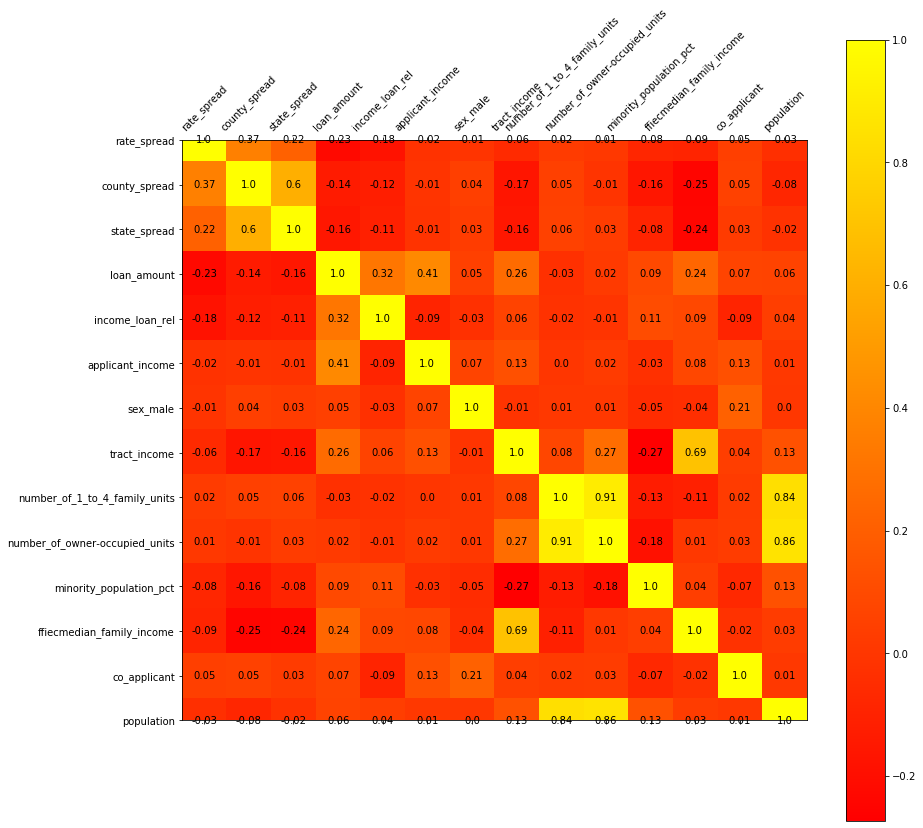

In [39]:
# training_data_pd[['applicant_income', 'loan_amount']].plot(kind='scatter')


df = training_data_pd[['rate_spread', 'county_spread', 'state_spread', 'loan_amount', 'income_loan_rel', 'applicant_income', 'sex_male', 'tract_income', 'number_of_1_to_4_family_units', 'number_of_owner-occupied_units', 'minority_population_pct', 'ffiecmedian_family_income', 'co_applicant', 'population']]

f = plt.figure(figsize=(14, 14))
plt.set_cmap('autumn')
corr = df.corr()
plt.matshow(corr, fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

for i in range(df.shape[1]):
    for j in range(df.shape[1]):
        value = corr.iloc[j, i]
        text = plt.text(j, i, round(value,2),
                       ha="center", va="center", color="black")

### Observations:

* There is a strong correlation between the loan_amount and the applicant's income
* There is a strong correlation between the population and the number of occupied owner units
* There is at medium correlation between the tract_income and the loan amount
* There is a negative correlation between the rate_spread and the loan_amount
* There is a medium correlation between the median family income and the loan amount
* There is a low correlation between the tract_income and the applicant's income
* There is a low correlation between the median family income and the loan amount
* There is a low a slight correlation between the median family income and the loan amount
* There is a low correlation between the existance of a co-applicant and the applicant's income
* There is a negative correlation between the minority percentage in that area and the tract_income
* There is a low, negative correlation between the rate_spread and the applicant's income

### Categorical insights

As many of the quantitative features by themselves just show small correlations let us get some insights about the categorical relations

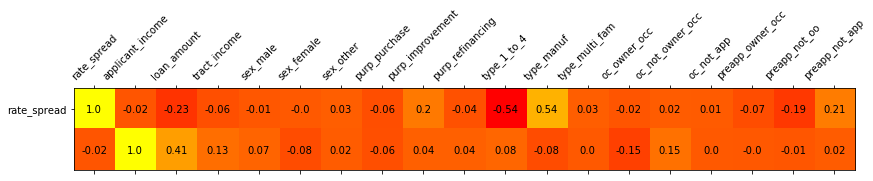

In [40]:
# training_data_pd[['applicant_income', 'loan_amount']].plot(kind='scatter')

df = pd.concat([training_data_pd[['rate_spread', 'applicant_income', 'loan_amount']], training_data_pd.loc[:,'tract_income':'preapp_not_app']], axis=1)

# from purp_purchase to preapp_not_app

f = plt.figure(figsize=(14, 14))
plt.set_cmap('autumn')
corr = df.corr()
plt.matshow(corr.iloc[:2,:], fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=45)
plt.yticks(range(1), df.columns)

for i in range(2):
    for j in range(df.shape[1]):
        value = corr.iloc[j, i]
        text = plt.text(j, i, round(value,2),
                       ha="center", va="center", color="black")

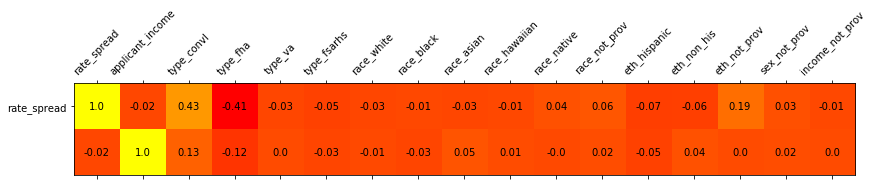

In [41]:
# training_data_pd[['applicant_income', 'loan_amount']].plot(kind='scatter')

df = pd.concat([training_data_pd[['rate_spread', 'applicant_income']], training_data_pd.loc[:,'type_convl':'income_not_prov']], axis=1)

f = plt.figure(figsize=(14, 14))
plt.set_cmap('autumn')
corr = df.corr()
plt.matshow(corr.iloc[:2,:], fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=45)
plt.yticks(range(1), df.columns)

for i in range(2):
    for j in range(df.shape[1]):
        value = corr.iloc[j, i]
        text = plt.text(j, i, round(value,2),
                       ha="center", va="center", color="black")

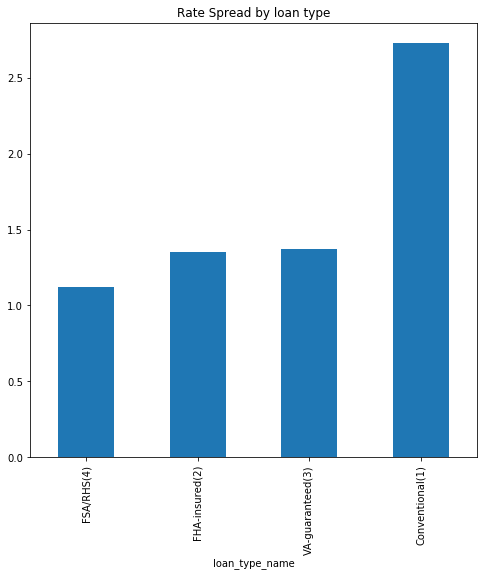

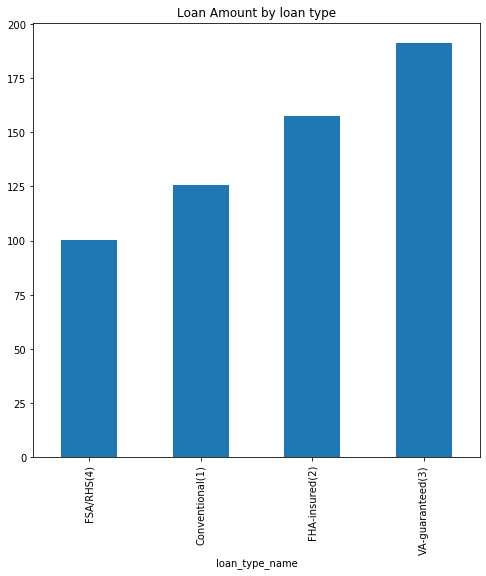

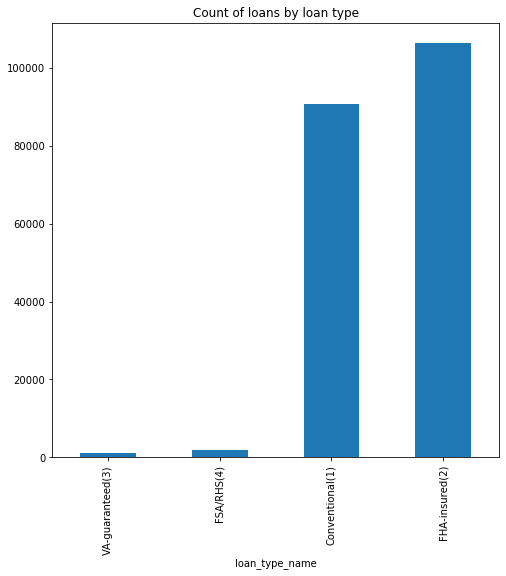

In [42]:
f = plt.figure(figsize=(8, 8))
training_data_pd.groupby('loan_type_name')['rate_spread'].mean().sort_values().plot(kind='bar')
plt.title('Rate Spread by loan type')
plt.show()
f = plt.figure(figsize=(8, 8))
training_data_pd.groupby('loan_type_name')['loan_amount'].mean().sort_values().plot(kind='bar')
plt.title('Loan Amount by loan type')
plt.show()
f = plt.figure(figsize=(8, 8))
plt.title('Count of loans by loan type')
training_data_pd.groupby('loan_type_name')['rate_spread'].count().sort_values().plot(kind='bar')
plt.show()

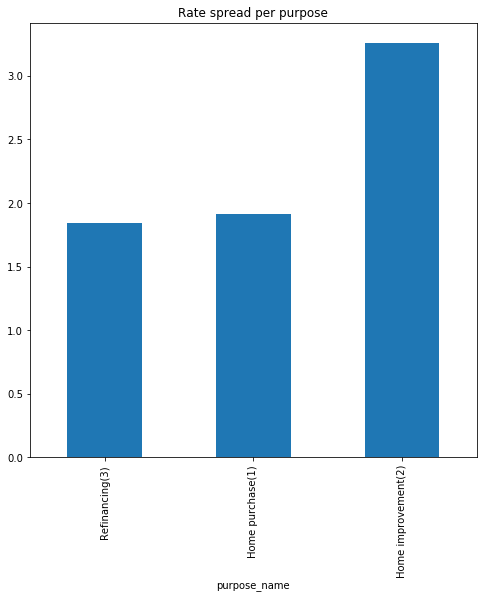

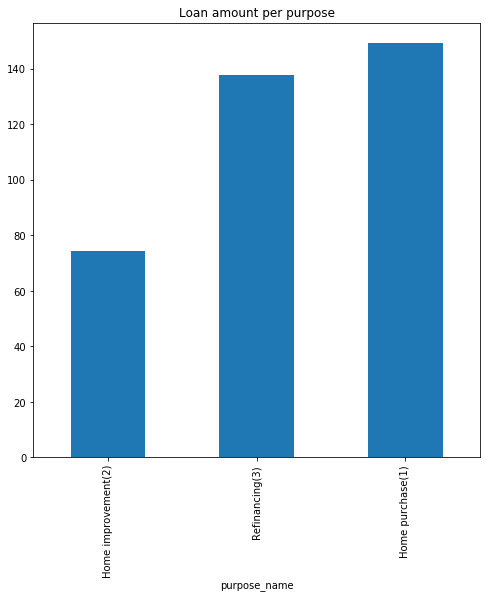

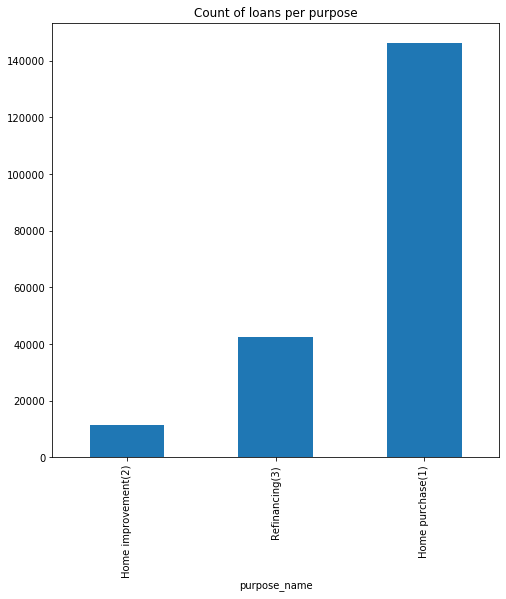

In [43]:
f = plt.figure(figsize=(8, 8))
training_data_pd.groupby('purpose_name')['rate_spread'].mean().sort_values().plot(kind='bar')
plt.title("Rate spread per purpose")
plt.show()
f = plt.figure(figsize=(8, 8))
training_data_pd.groupby('purpose_name')['loan_amount'].mean().sort_values().plot(kind='bar')
plt.title("Loan amount per purpose")
plt.show()
f = plt.figure(figsize=(8, 8))
training_data_pd.groupby('purpose_name')['loan_amount'].count().sort_values().plot(kind='bar')
plt.title("Count of loans per purpose")
plt.show()

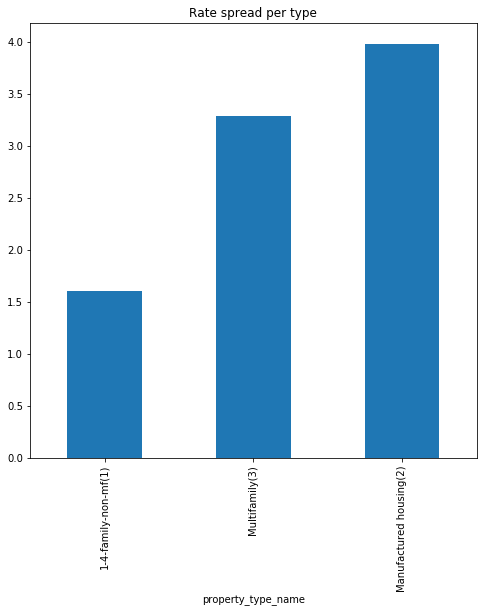

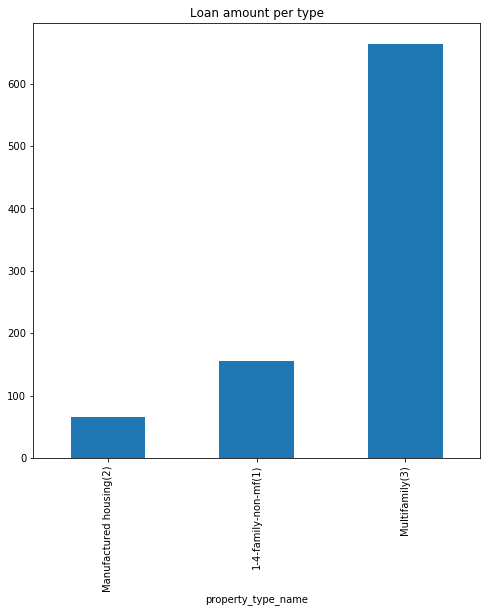

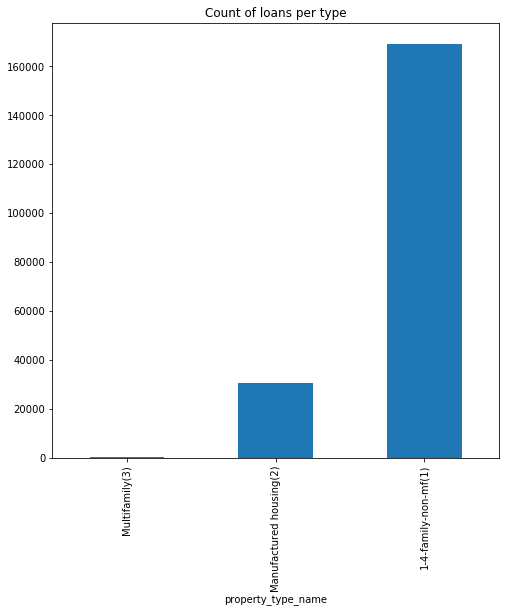

In [44]:
f = plt.figure(figsize=(8, 8))
training_data_pd.groupby('property_type_name')['rate_spread'].mean().sort_values().plot(kind='bar')
plt.title("Rate spread per type")
plt.show()
f = plt.figure(figsize=(8, 8))
training_data_pd.groupby('property_type_name')['loan_amount'].mean().sort_values().plot(kind='bar')
plt.title("Loan amount per type")
plt.show()
f = plt.figure(figsize=(8, 8))
training_data_pd.groupby('property_type_name')['loan_amount'].count().sort_values().plot(kind='bar')
plt.title("Count of loans per type")
plt.show()

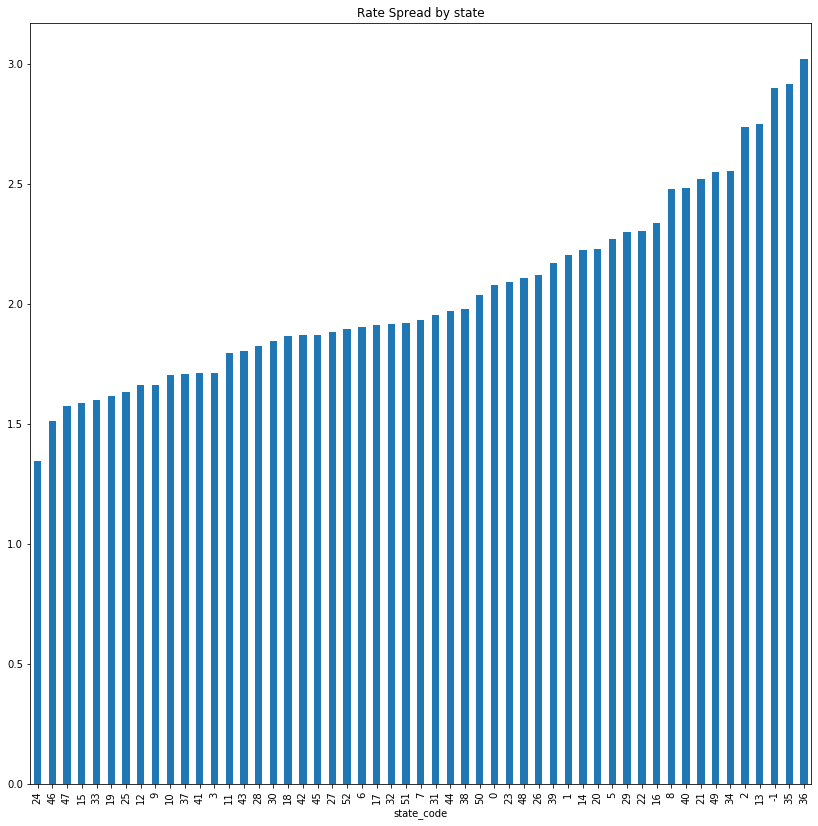

In [45]:
f = plt.figure(figsize=(14, 14))
training_data_pd.groupby('state_code')['rate_spread'].mean().sort_values().plot(kind='bar')
plt.title('Rate Spread by state')
plt.show()

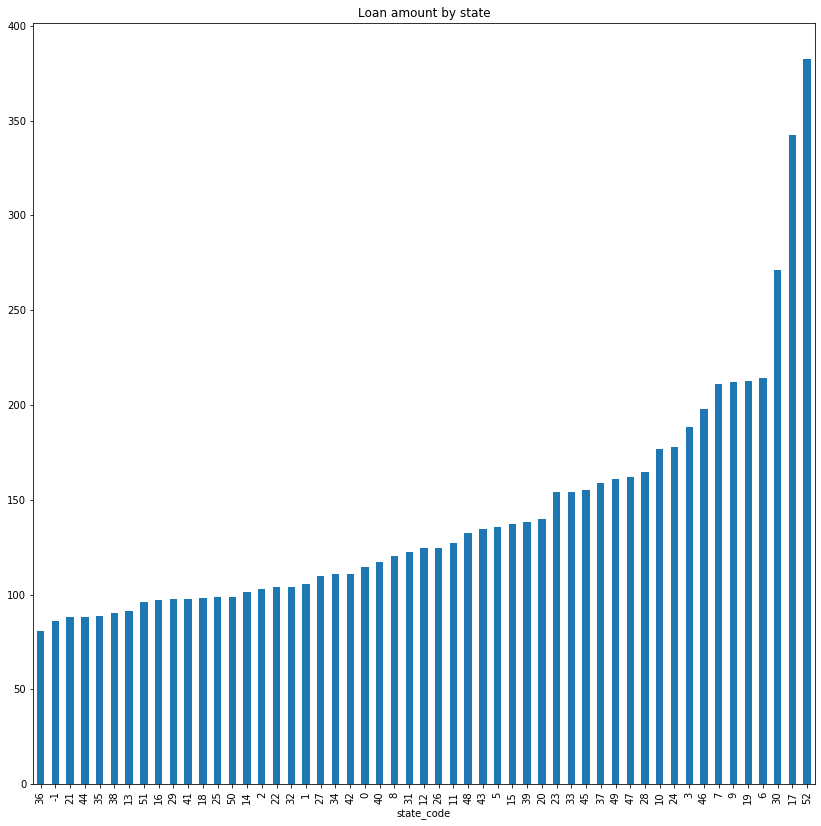

In [46]:
f = plt.figure(figsize=(14, 14))
training_data_pd.groupby('state_code')['loan_amount'].mean().sort_values().plot(kind='bar')
plt.title('Loan amount by state')
plt.show()

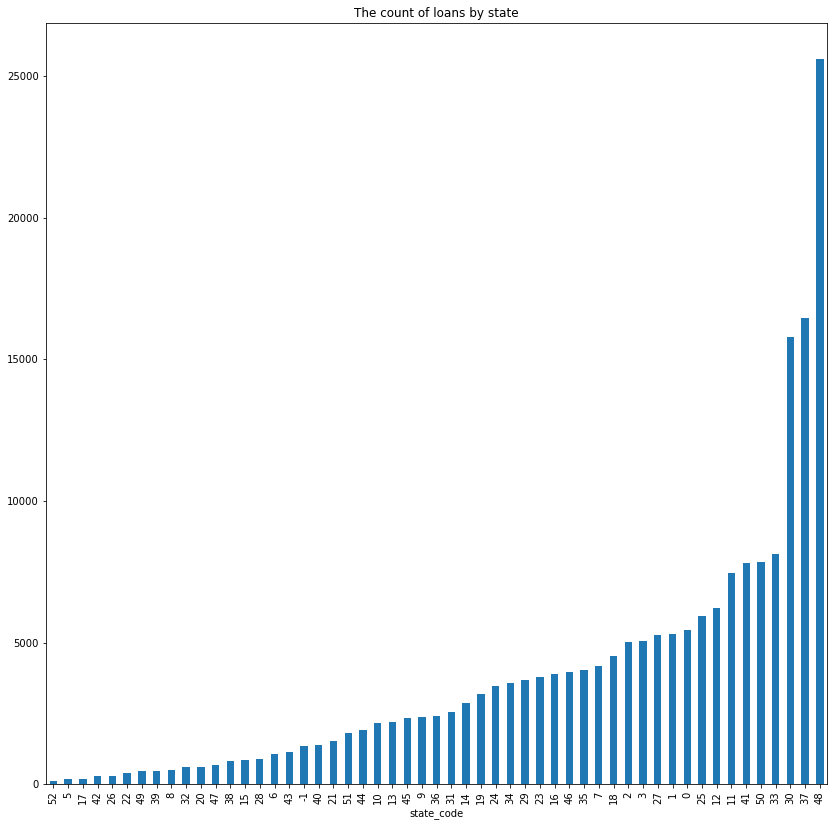

In [47]:
f = plt.figure(figsize=(14, 14))
plt.title('Count of loans')
training_data_pd.groupby('state_code')['rate_spread'].count().sort_values().plot(kind='bar')
plt.title('The count of loans by state')
plt.show()

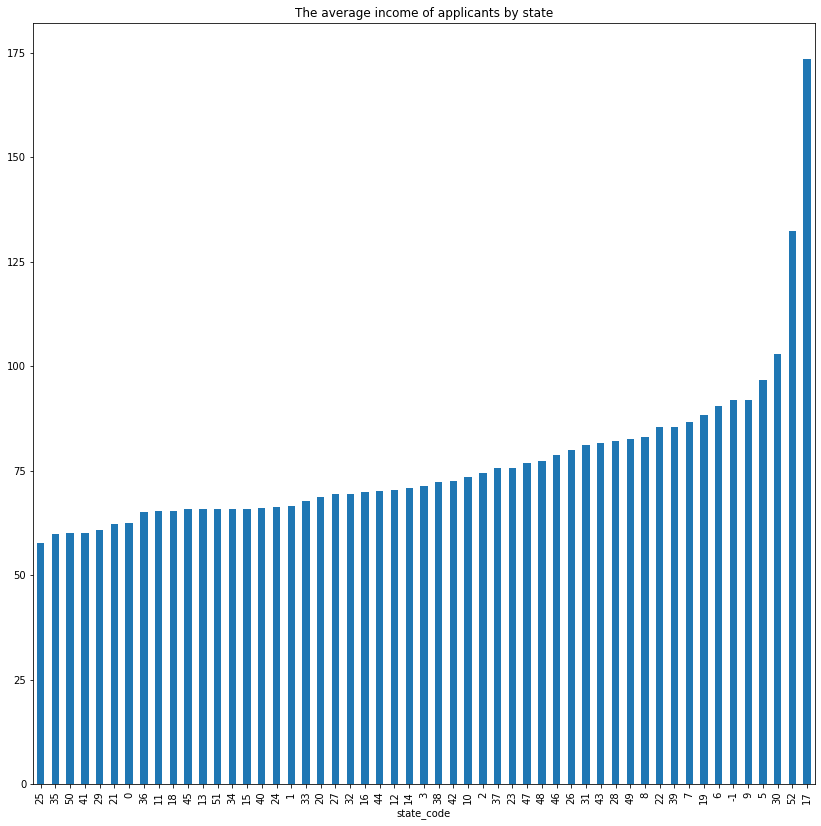

In [48]:
f = plt.figure(figsize=(14, 14))
plt.title('Average income')
training_data_pd.groupby('state_code')['applicant_income'].mean().sort_values().plot(kind='bar')
plt.title('The average income of applicants by state')
plt.show()

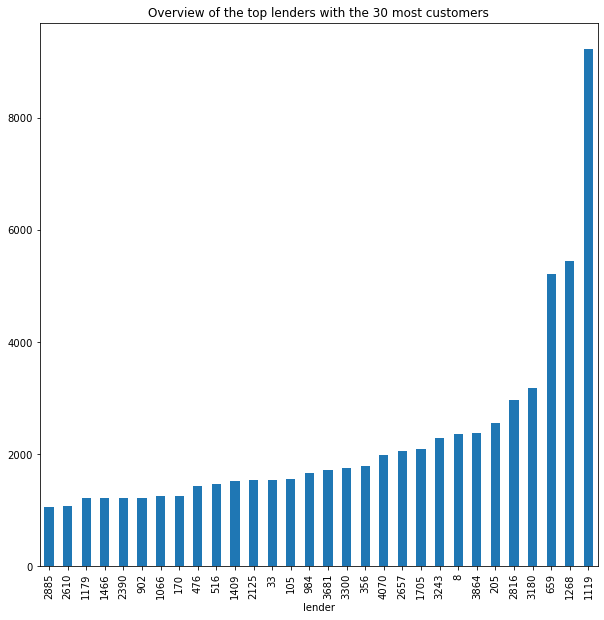

In [49]:
f = plt.figure(figsize=(10, 10))
training_data_pd.groupby('lender')['rate_spread'].count().sort_values().tail(30).plot(kind='bar')
plt.title('Overview of the top lenders with the 30 most customers')
plt.show()

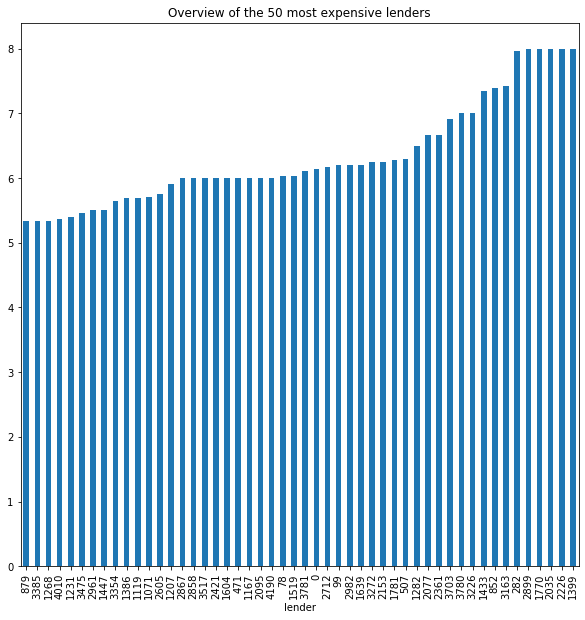

In [50]:
f = plt.figure(figsize=(10, 10))
training_data_pd.groupby('lender')['rate_spread'].mean().sort_values().tail(50).plot(kind='bar')
plt.title('Overview of the 50 most expensive lenders')
plt.show()

In [51]:
print("{} counties".format(training_data_pd.groupby(['state_code','county_code'])['loan_amount'].count().count()))

3109 counties


### Visualizing the correlations between our aggregated data and the rate spread

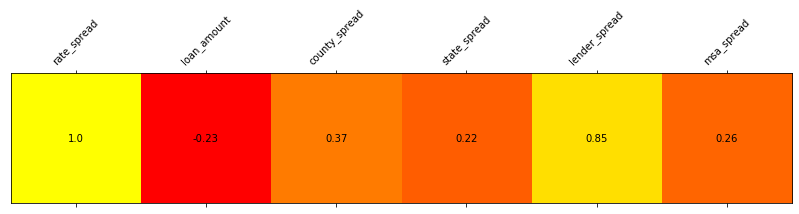

In [52]:
df = pd.DataFrame(training_data_pd[['rate_spread', 'loan_amount', 'county_spread', 'state_spread', 'lender_spread', 'msa_spread']])
f = plt.figure(figsize=(14, 14))
plt.set_cmap('autumn')
corr = df.corr()
plt.matshow(corr.iloc[:1,:], fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=45)
plt.yticks(range(0), df.columns)

for i in range(1):
    for j in range(df.shape[1]):
        value = corr.iloc[j, i]
        text = plt.text(j, i, round(value,2),
                       ha="center", va="center", color="black")

In [53]:
training_data_pd.to_csv(TEMP_PATH+CLEANED_TRAINING_OUTPUT_FN, index=False)
test_values_pd.to_csv(TEMP_PATH+CLEANED_TEST_OUTPUT_FN, index=False)

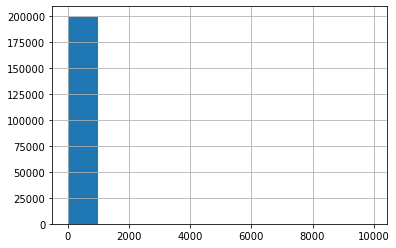

In [54]:
test_values_pd['applicant_income'].hist()

In [55]:
test_values_pd.count()

row_id                            200000
loan_type                         200000
property_type                     200000
loan_purpose                      200000
occupancy                         200000
loan_amount                       200000
preapproval                       200000
msa_md                            200000
state_code                        200000
county_code                       200000
applicant_ethnicity               200000
applicant_race                    200000
applicant_sex                     200000
applicant_income                  200000
population                        200000
minority_population_pct           200000
ffiecmedian_family_income         200000
tract_to_msa_md_income_pct        200000
number_of_owner-occupied_units    200000
number_of_1_to_4_family_units     200000
lender                            200000
co_applicant                      200000
tract_income                      200000
sex_male                          200000
sex_female      